# DeepAggregation

¿Does DeepAggregation improve the results?

In [1]:
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)

"""
results/ml1m/groups-2-mlp_gpa_avg.csv
results/ml1m/groups-2-mlp_gpa_expert.csv
results/ml1m/groups-2-mlp_gpa_mlp_max.csv
results/ml1m/groups-2-mlp_gpa_mlp_mean.csv
results/ml1m/groups-2-mlp_gpa_mlp_median.csv
results/ml1m/groups-2-mlp_gpa_mlp_min.csv
results/ml1m/groups-2-mlp_gpa_mlp_mode.csv
results/ml1m/groups-2-mlp_gpa_softmax.csv
results/ml1m/groups-2-mlp_ipa.csv
"""

"""
@param model: mlp o gmf

def get_models_files(model):
    return {
        'ipa_'+model: model+'_ipa',
        'mo_avg_'+model: model+'_gpa_avg',
        'mlp_mean_'+model: model+'_gpa_mlp_mean',
    }
"""

def get_all_models_files():
    return {
        'ipa_mlp': 'mlp_ipa',
        'mo_avg_mlp_deep_group': 'mlp_gpa_avg',
        'mlp_mean_mlp': 'mlp_gpa_mlp_mean',
        'ipa_gmf': 'gmf_ipa',
        'mo_softmax_gmf': 'gmf_gpa_softmax',
        'mlp_mean_gmf': 'gmf_gpa_mlp_mean',
    }

"""
@param labels_models: labels_models list
@param ds: dataset name
"""
def get_error(models_files, ds):
    datapath=f'../data/grupos/{ds}/'
    restulspath=f'../results/{ds}/'

    models = models_files.keys()
    
    # Load data
    groups = {}

    fromngroups=2
    tongroups=8 # Change

    # Load groups data
    for g in range(fromngroups,tongroups+1):
        groups[g] = pd.read_csv(f"{datapath}groups-{g}-test.csv")
        groups[g]['g'] = g
    
    
    # Load model predictions
    for g in range(fromngroups,tongroups+1):
        for model in models:
            file_name = models_files[model]
            groups[g][model] = pd.read_csv(
                f"{restulspath}groups-{g}-{file_name}.csv",
                header=0,
                names=["data"]
            )['data']
    
    # Compute error
    for g in range(fromngroups,tongroups+1):    # Each group
        for m in models:                        # Each model
            for gi in range(1,g+1):             # Each rating in group
                groups[g][m+'-error-'+str(gi)] = abs(groups[g]['rating-'+str(gi)] - groups[g][m])
                groups[g][m+'-error2-'+str(gi)] = (groups[g]['rating-'+str(gi)] - groups[g][m])**2
    
    for g in range(fromngroups,tongroups+1):    # Each group
        for m in models:                        # Each model
            groups[g][m+'-ERROR'] = groups[g].filter(regex='^'+m+'-error-',axis=1).mean(axis=1, skipna=True)
            groups[g][m+'-ERROR2'] = groups[g].filter(regex='^'+m+'-error2-',axis=1).mean(axis=1, skipna=True)
    
    # Join dict of groups
    results = pd.concat(groups, join='inner', ignore_index=True)
    # Calculate means
    means = results.groupby('g').mean()

    return means, results, groups 

#DS='ml1m'
#DS='ft'
#DS='anime'
#DS='netflix'

In [2]:
#DS='ml1m'
#DS='ft'
#DS='anime'
#DS='netflix'
#all_models = get_models_files('mlp')
#all_models.update(get_models_files('gmf'))
all_models = get_all_models_files()

means_ft, results_ft, results_dict_ft = get_error(all_models , 'ft')


In [3]:
"""
pd.options.display.max_columns = None
pd.options.display.max_rows = None
means.T
pd.options.display.max_columns = 10
pd.options.display.max_rows = 30
"""
all_models

{'ipa_mlp': 'mlp_ipa',
 'mo_avg_mlp_deep_group': 'mlp_gpa_avg',
 'mlp_mean_mlp': 'mlp_gpa_mlp_mean',
 'ipa_gmf': 'gmf_ipa',
 'mo_softmax_gmf': 'gmf_gpa_softmax',
 'mlp_mean_gmf': 'gmf_gpa_mlp_mean'}

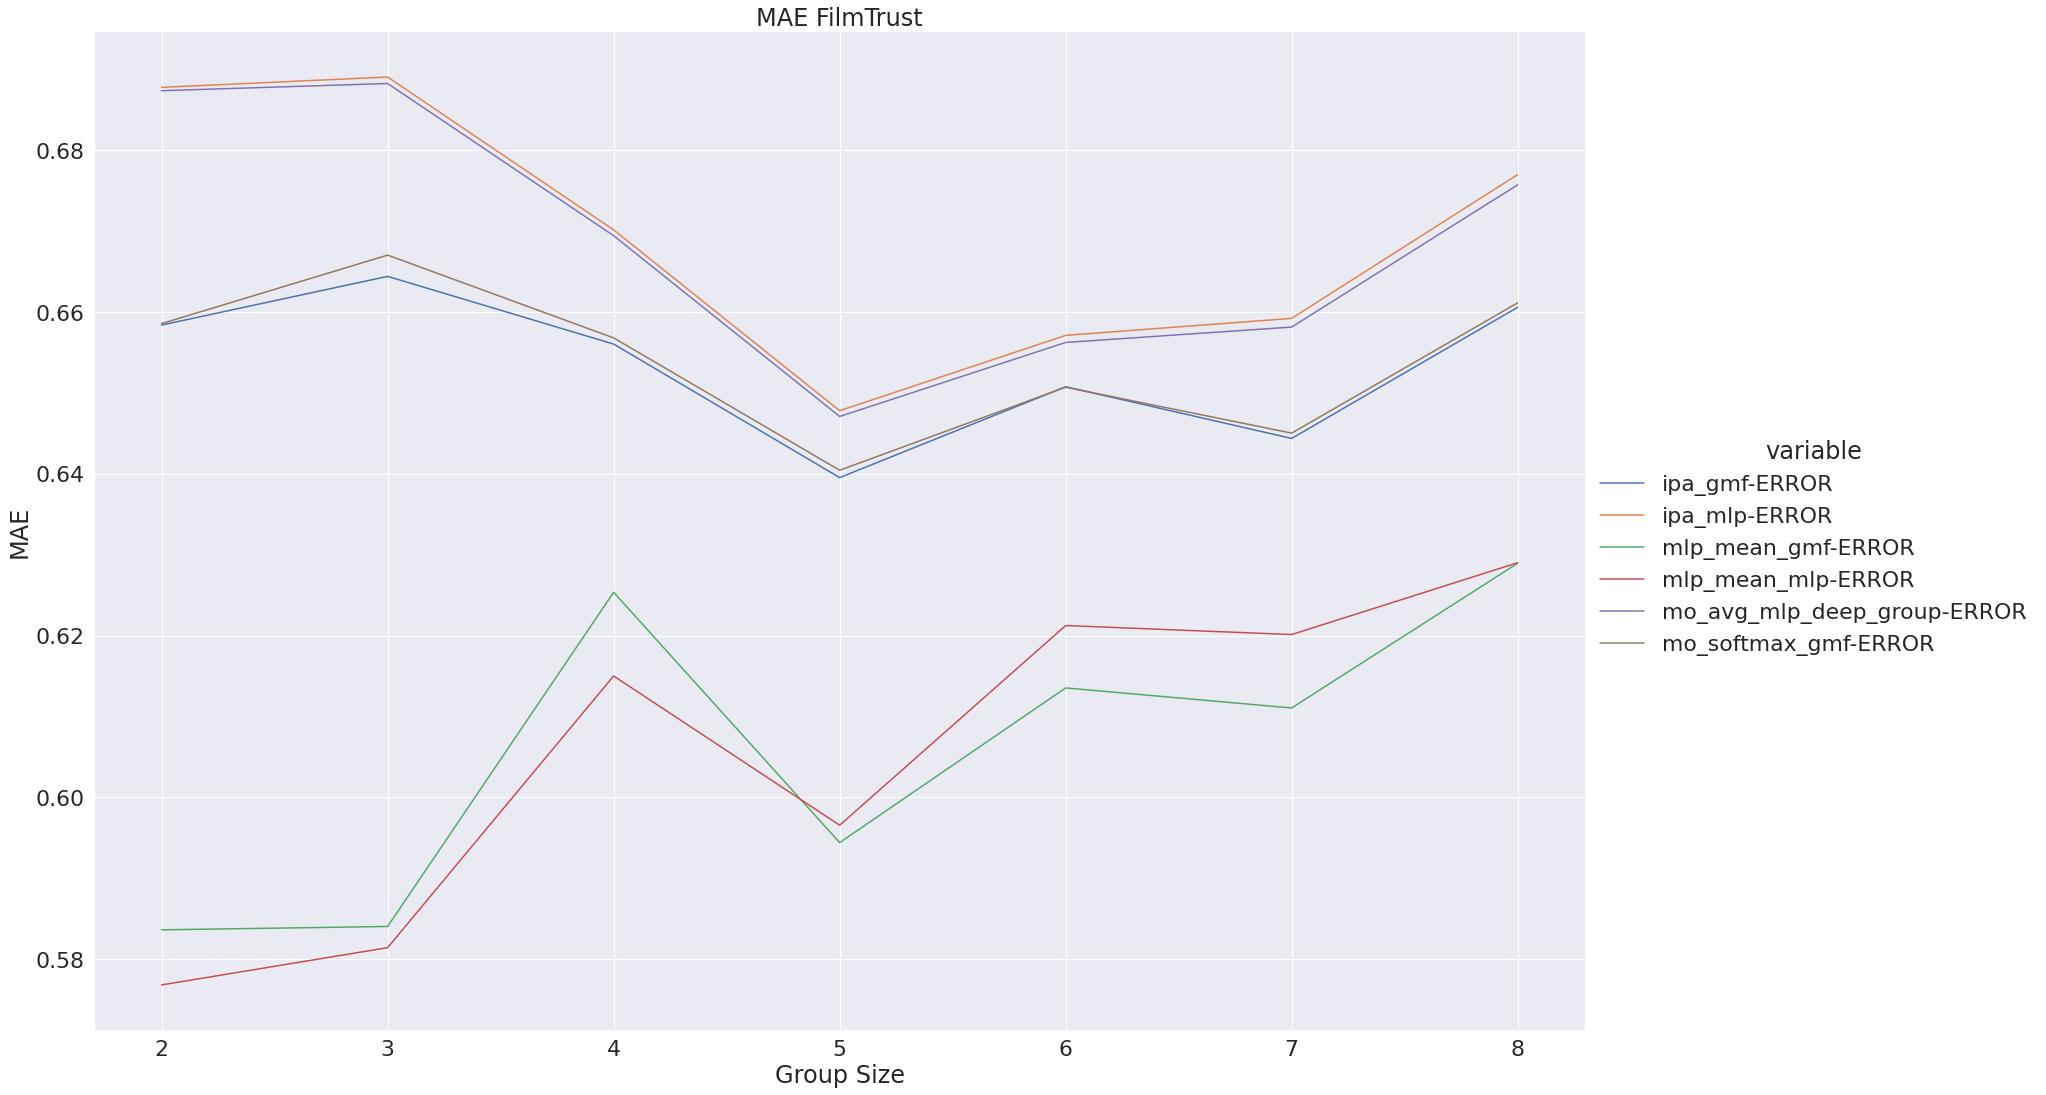

In [4]:
models = [m+'-ERROR' for m in all_models.keys()]
long_data = pd.melt(results_ft[['g']+models], id_vars =['g'], value_vars=models)
ax = sns.relplot(
    data=long_data.groupby(['g','variable']).mean(), kind="line",
    x="g", y="value", hue="variable",
    height=15, aspect=1.5
)
ax.set(title='MAE FilmTrust')
ax.axes[0,0].set_xlabel('Group Size')
ax.axes[0,0].set_ylabel('MAE')
plt.show()

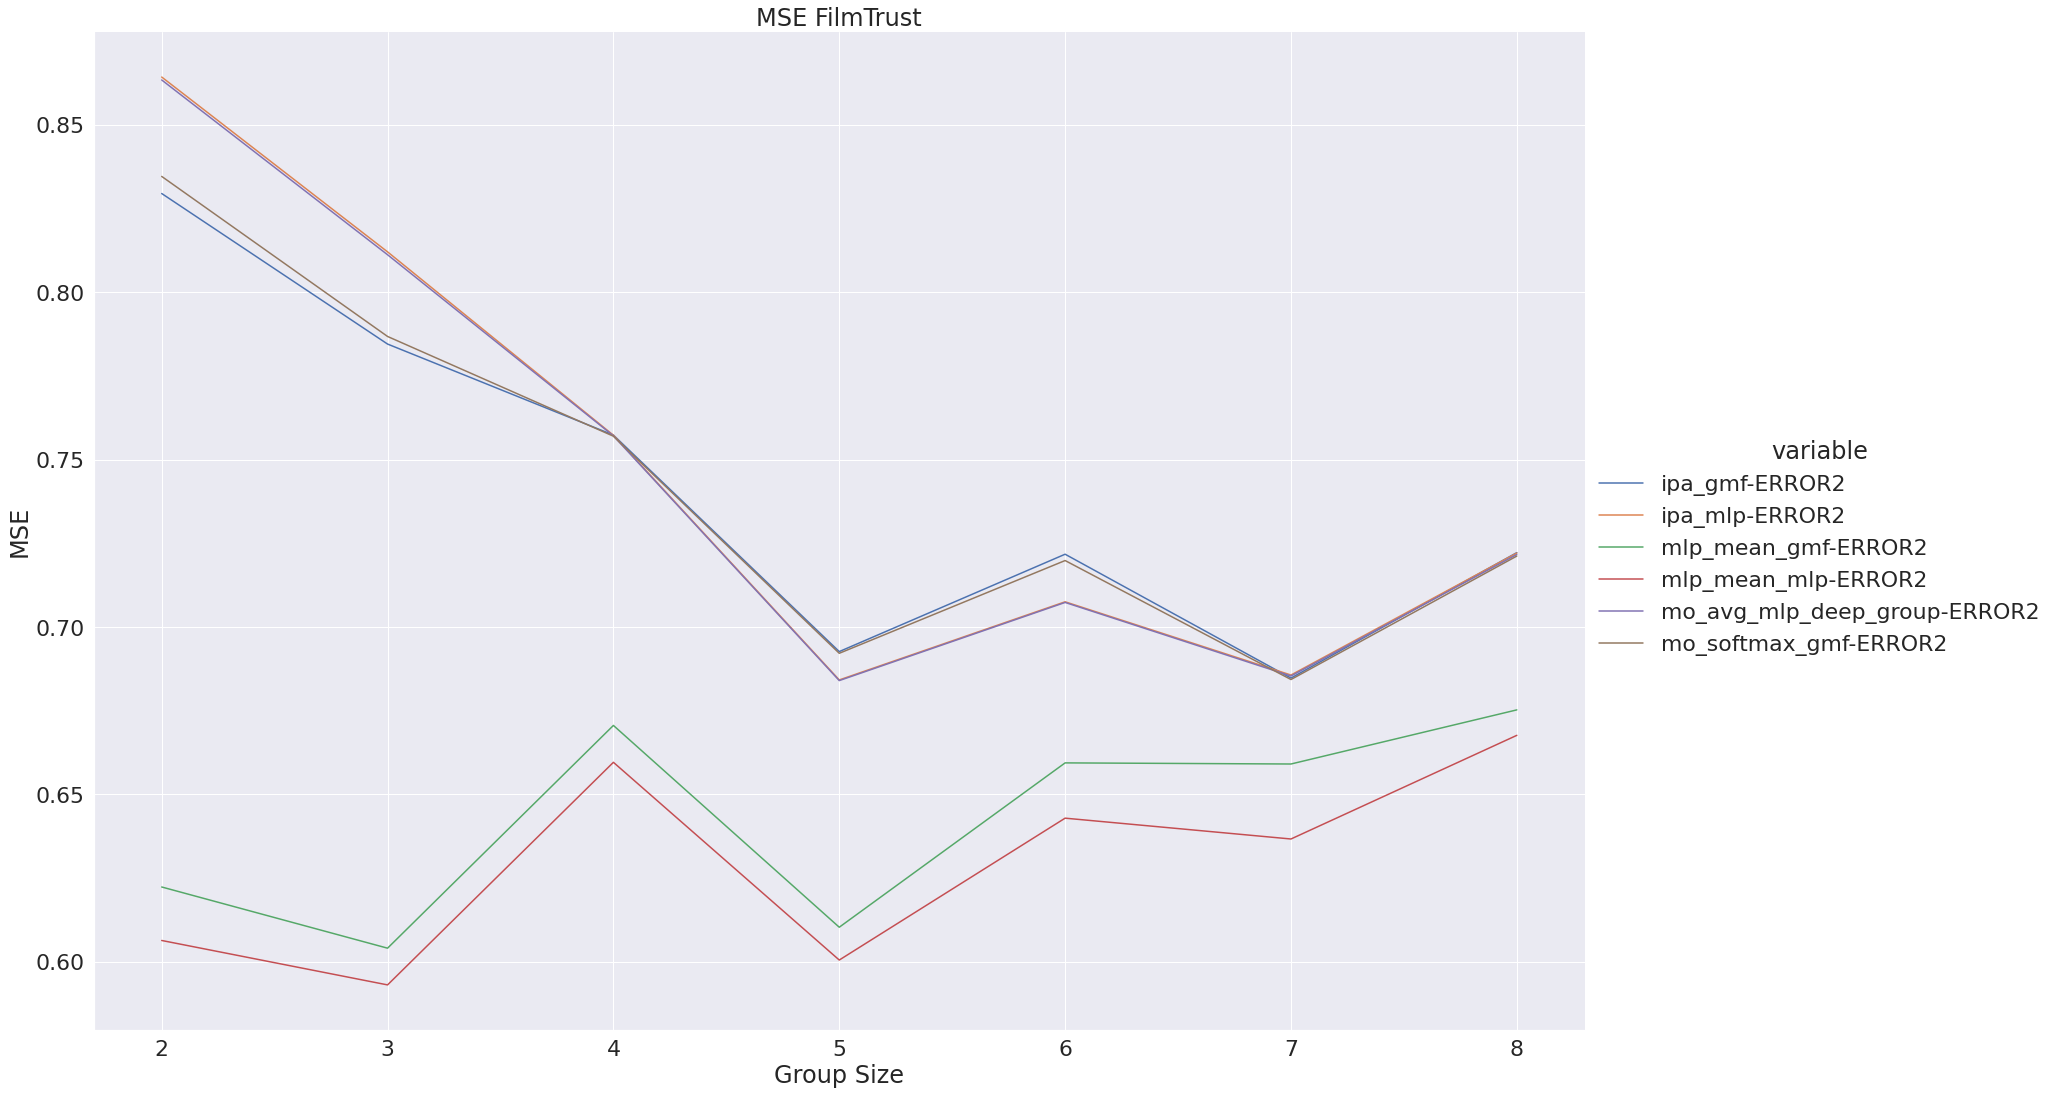

In [5]:
models = [m+'-ERROR2' for m in all_models.keys()]
long_data = pd.melt(results_ft[['g']+models], id_vars =['g'], value_vars=models)
ax = sns.relplot(
    data=long_data.groupby(['g','variable']).mean(), kind="line",
    x="g", y="value", hue="variable",
    height=15, aspect=1.5
)
ax.set(title='MSE FilmTrust')
ax.axes[0,0].set_xlabel('Group Size')
ax.axes[0,0].set_ylabel('MSE')
plt.show()

In [6]:
means_ml1m, results_ml1m, results_dict_ml1m = get_error(all_models , 'ml1m')

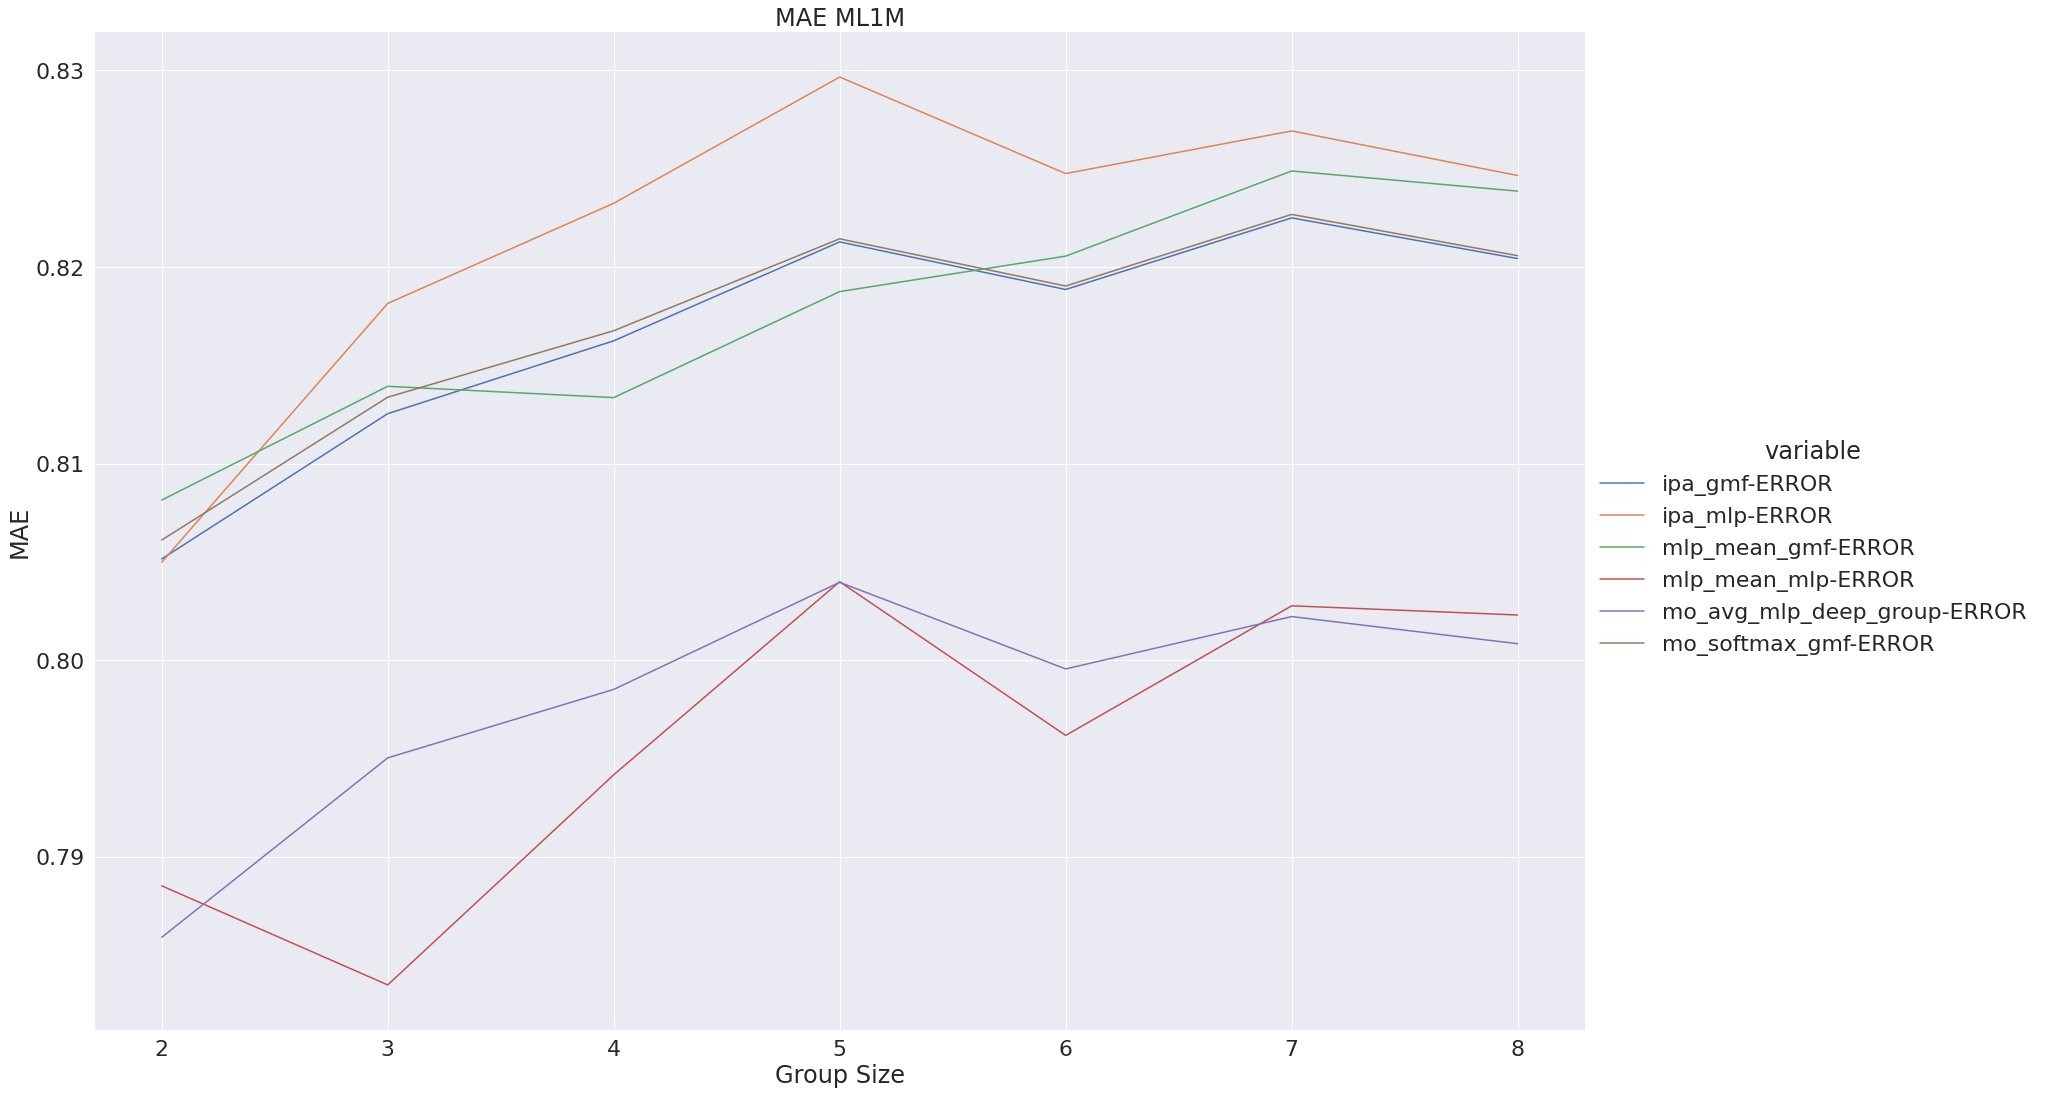

In [7]:
models = [m+'-ERROR' for m in all_models.keys()]
long_data = pd.melt(results_ml1m[['g']+models], id_vars =['g'], value_vars=models)
ax = sns.relplot(
    data=long_data.groupby(['g','variable']).mean(), kind="line",
    x="g", y="value", hue="variable",
    height=15, aspect=1.5
)
ax.set(title='MAE ML1M')
ax.axes[0,0].set_xlabel('Group Size')
ax.axes[0,0].set_ylabel('MAE')
plt.show()

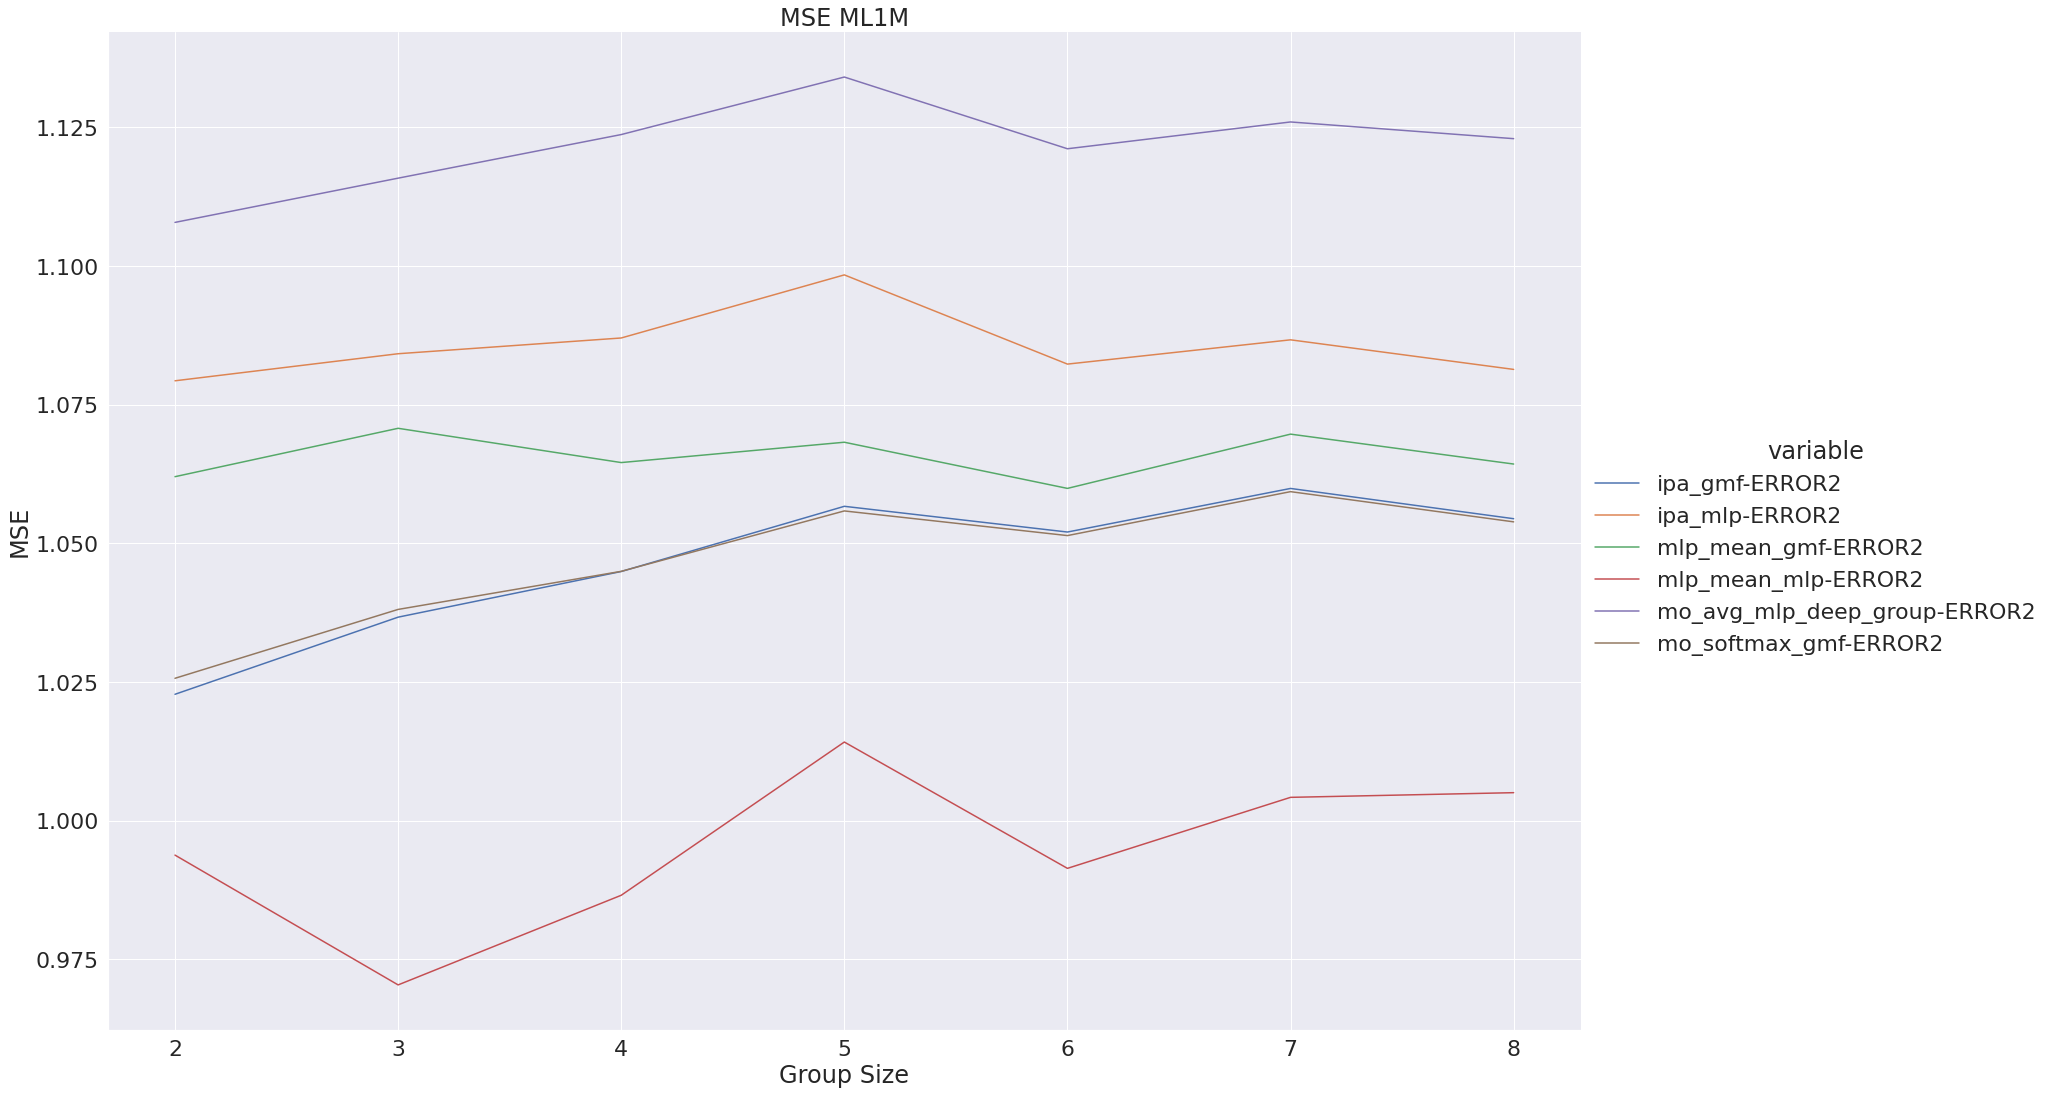

In [8]:
models = [m+'-ERROR2' for m in all_models.keys()]
long_data = pd.melt(results_ml1m[['g']+models], id_vars =['g'], value_vars=models)
ax = sns.relplot(
    data=long_data.groupby(['g','variable']).mean(), kind="line",
    x="g", y="value", hue="variable",
    height=15, aspect=1.5
)
ax.set(title='MSE ML1M')
ax.axes[0,0].set_xlabel('Group Size')
ax.axes[0,0].set_ylabel('MSE')
plt.show()

In [ ]:


"""
sns.relplot(
    data=long_data, kind="line",
    x="g", y="value", hue="variable",
    height=15, aspect=1.5
)
sns.catplot(data=long_data, x="g", y="value", hue="variable", kind="box", height=15, aspect=1.5)
"""



In [ ]:
models = [m+'-ERROR2' for m in all_models.keys()]
long_data = pd.melt(results[['g']+models], id_vars =['g'], value_vars=models)

sns.relplot(
    data=long_data.groupby(['g','variable']).mean(), kind="line",
    x="g", y="value", hue="variable",
    height=15, aspect=1.5
)

In [ ]:
all_models = get_models_files('mlp')
all_models.update(get_models_files('gmf'))
means, results, results_dict = get_error(all_models , 'ml1m')

models = [m+'-ERROR' for m in all_models.keys()]
long_data = pd.melt(results[['g']+models], id_vars =['g'], value_vars=models)

sns.relplot(
    data=long_data.groupby(['g','variable']).mean(), kind="line",
    x="g", y="value", hue="variable",
    height=15, aspect=1.5
)

In [ ]:
models = [m+'-ERROR2' for m in all_models.keys()]
long_data = pd.melt(results[['g']+models], id_vars =['g'], value_vars=models)

sns.relplot(
    data=long_data.groupby(['g','variable']).mean(), kind="line",
    x="g", y="value", hue="variable",
    height=15, aspect=1.5
)

In [ ]:
"""
@param model: mlp o gmf
"""
def get_models_files_less(model):
    return {
        'ipa': model+'_ipa',
        'mo_avg': model+'_gpa_avg',
        'mo_expert': model+'_gpa_expert',
        'mo_softmax': model+'_gpa_softmax',
        #'mlp_min': model+'_gpa_mlp_min',
        #'mlp_max': model+'_gpa_mlp_max',
        'mlp_mean': model+'_gpa_mlp_mean',
        'mlp_median': model+'_gpa_mlp_median',
        'mlp_mode': model+'_gpa_mlp_mode',
    }

means, results, results_dict = get_error(get_models_files_less('mlp'), 'ml1m')
models = [m+'-ERROR' for m in get_models_files_less('mlp').keys()]
long_data = pd.melt(results[['g']+models], id_vars =['g'], value_vars=models)
sns.relplot(
    data=long_data, kind="line",
    x="g", y="value", hue="variable",
    height=15, aspect=1.5
)



In [ ]:
means, results, results_dict = get_error(get_models_files_less('mlp'), 'ml1m')
models = [m+'-ERROR2' for m in get_models_files_less('mlp').keys()]
long_data = pd.melt(results[['g']+models], id_vars =['g'], value_vars=models)
sns.relplot(
    data=long_data, kind="line",
    x="g", y="value", hue="variable",
    height=15, aspect=1.5
)

In [ ]:
fmri = sns.load_dataset("fmri")

fmri

In [ ]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal"
)

In [ ]:
tips

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

In [ ]:
import matplotlib.pyplot as plt

def graph_mae(means):
    #plot each series
    SUBFIX='-ERROR'
    for m in models:
        plt.plot(means[m+SUBFIX], label=labels[m])
    plt.legend(title='model')
    plt.ylabel("MAE")
    plt.xlabel("Group size")
    plt.show()

def graph_mse(means):
    #plot each series
    SUBFIX='-ERROR2'
    for m in models:
        plt.plot(means[m+SUBFIX], label=labels[m])
    plt.legend(title='model')
    plt.ylabel("MSE")
    plt.xlabel("Group size")
    plt.show()


In [ ]:
means = get_error('ml1m')
graph_mse(means)

In [ ]:
means = get_error('ml1m')
graph_mae(means)

In [ ]:
means = get_error('ft')
graph_mse(means)

In [ ]:
means = get_error('ft')
graph_mae(means)

In [ ]:
means = get_error('anime')
graph_mse(means)

In [ ]:
means = get_error('anime')
graph_mae(means)